In [20]:
import pandas as pd
import numpy as np
from statistics import mean
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [21]:
data = pd.read_csv('petrol_consumption.csv')
#print(data)

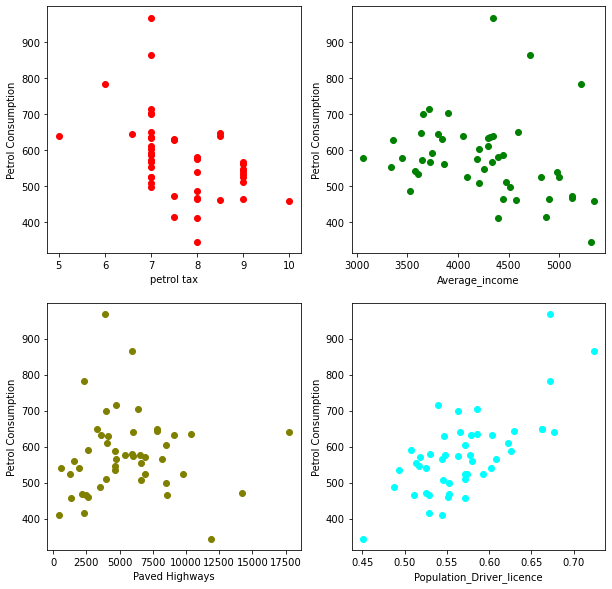

In [22]:
figure_size = (10,10)
plt.figure( figsize = figure_size )
plt.subplot(2,2,1)
plt.scatter( data['Petrol_tax'], data['Petrol_Consumption'],color = 'red' )
plt.xlabel("petrol tax")
plt.ylabel("Petrol Consumption")

plt.subplot(2,2,2)
plt.scatter( data['Average_income'], data['Petrol_Consumption'],color = 'green' )
plt.xlabel("Average_income")
plt.ylabel("Petrol Consumption")

plt.subplot(2,2,3)
plt.scatter( data['Paved_Highways'], data['Petrol_Consumption'],color = 'olive' )
plt.xlabel("Paved Highways")
plt.ylabel("Petrol Consumption")

plt.subplot(2,2,4)
plt.scatter( data['Population_Driver_licence(%)'], data['Petrol_Consumption'],color = 'cyan' )
plt.xlabel("Population_Driver_licence")
plt.ylabel("Petrol Consumption")

plt.show()

In [23]:
# Create X label
X = np.array(data.drop(['Petrol_Consumption'], 1))
#print(X)
# Create Y label
Y = np.array(data.drop(['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)'], 1))
#print(Y)

In [24]:
'''
Select algorithm based on data analysis
- Split training and testing data
- we will be using Linear regression as regression problem
- Tranining data 70%
- Testing data 30%
'''

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3 )
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(33, 4) (33, 1)
(15, 4) (15, 1)


In [25]:
# Apply Linear Regression
reg = LinearRegression()
model = reg.fit(X_train, Y_train)

In [26]:
#y = (m1 * x1 + m2  * x2 + m3 * x3 + m4 * x4) + b
#b = y-intercept
#m1 = slope of a line representing relation between x1(petrol tax) and y(petrol consumption)
#m2 = slope of a line representing relation between x2(average income) and y(petrol consumption)
#m3 = slope of a line representing relation between x3(paved highways) and y(petrol consumption)
#m4 = slope of a line representing relation between x4(population driver licence) and y(petrol consumption)
#get linear regression coefficients
slope = reg.coef_[0]
intercept = reg.intercept_
print("Slope : {}, Intercept : {}".format(slope, intercept))

Slope : [-2.99689855e+01 -5.82932540e-02 -1.15724771e-03  1.08922016e+03], Intercept : [431.32755009]


In [27]:
predicted_petrol_consumption_train = np.zeros(Y_train.shape)
for i in range(len((X_train))):
    predicted_petrol_consumption_train[i] = (slope[0] * X_train[i][0]) + (slope[1] * X_train[i][1]) + (slope[2] * X_train[i][2]) + (slope[3] * X_train[i][3]) + intercept
print("predicted training data : {}".format(predicted_petrol_consumption_train))


predicted training data : [[666.89082613]
 [578.39228876]
 [644.97595219]
 [507.08730818]
 [463.17280886]
 [557.93869456]
 [623.47682287]
 [653.98715005]
 [581.22519583]
 [440.6372347 ]
 [549.93031378]
 [601.9041171 ]
 [638.68131509]
 [676.80628345]
 [566.2155542 ]
 [527.18063723]
 [602.53695742]
 [471.09796711]
 [596.15145558]
 [641.60684413]
 [556.11425704]
 [589.55129555]
 [625.26983024]
 [562.31523146]
 [617.0438352 ]
 [512.32270514]
 [483.29701198]
 [506.02378055]
 [635.04279987]
 [564.53526823]
 [518.06891889]
 [429.90201993]
 [498.61731869]]


(33, 4)
(33, 1)
(33, 1)


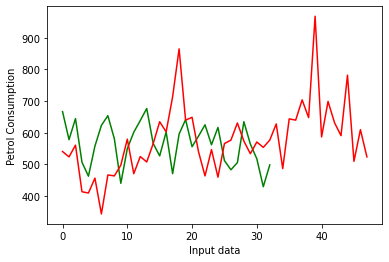

In [28]:
print(X_train.shape)
print(Y_train.shape)
print(predicted_petrol_consumption_train.shape)
plt.plot(predicted_petrol_consumption_train, color = 'green')
plt.xlabel('Input data')
plt.ylabel('Petrol Consumption')
plt.plot(data["Petrol_Consumption"],color = "red")
plt.show()

In [29]:
predicted_petrol_consumption_test = np.zeros(Y_test.shape)
for i in range(len((X_test))):
    predicted_petrol_consumption_test[i] = (slope[0] * X_test[i][0]) + (slope[1] * X_test[i][1]) + (slope[2] * X_test[i][2]) + (slope[3] * X_test[i][3]) + intercept
print("predicted testing data : {}".format(predicted_petrol_consumption_test))

predicted testing data : [[688.5542784 ]
 [492.62900118]
 [522.99533525]
 [728.38394426]
 [683.05933484]
 [565.58245656]
 [553.75991562]
 [695.69736088]
 [496.14878925]
 [553.53868493]
 [544.65805945]
 [587.52122637]
 [359.01792615]
 [531.74095409]
 [621.8221509 ]]


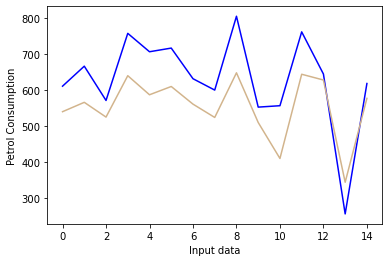

In [16]:
plt.plot(predicted_petrol_consumption_test, color = 'blue')
plt.xlabel('Input data')
plt.ylabel('Petrol Consumption')
plt.plot(Y_test,color = "tan")
plt.show()

In [17]:
sum_of_actual_testing_data = 0 
for i in range(len(Y_test)):
    sum_of_actual_testing_data = sum_of_actual_testing_data + Y_test[i] 
print(sum_of_actual_testing_data)

sum_of_predicted_testing_data = 0
for i in range(len(predicted_petrol_consumption_test)):
    sum_of_predicted_testing_data = sum_of_predicted_testing_data + predicted_petrol_consumption_test[i] 
print(sum_of_predicted_testing_data)

accuracy_check = (sum_of_actual_testing_data/sum_of_predicted_testing_data)*100
print(accuracy_check)



[8314]
[9456.0225347]
[87.92280231]


In [18]:
accuracy_check_in_percentage = np.zeros(Y_test.shape)
for i in range(len(Y_test)):
    accuracy_check_in_percentage[i] = ((Y_test[i] - predicted_petrol_consumption_test[i])/Y_test[i]) * 100
print(abs(accuracy_check_in_percentage))

sum = 0
for i in range(len(accuracy_check_in_percentage)):
    sum = (sum + accuracy_check_in_percentage[i])
#print(sum)
mean_of_accuracy = sum/len(accuracy_check_in_percentage)    
    
print("mean",( mean_of_accuracy))

[[13.13060649]
 [17.74166042]
 [ 8.79922843]
 [18.37778154]
 [20.36035683]
 [17.49049661]
 [12.58478192]
 [14.50575117]
 [24.25140057]
 [ 8.37270191]
 [35.75695677]
 [18.28558039]
 [ 2.64214746]
 [25.58072723]
 [ 7.15080135]]
mean [-12.92463497]


In [19]:
print(Y_test[0])
a = reg.score(X_test,Y_test)
b = reg.score(X_train,Y_train)
print("Testing data : {},Training data : {}".format(a,b))
#accuracy_score(X_test,Y_test)

[540]
Testing data : -0.34452688778518725,Training data : 0.7601588789139249
